# EDA bundesliga

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_style(style="dark")

#To do:
- Organize columns order
- Find correlation between event
- Plot more distribution
- Write conclusion
- Data unbalanced

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']
...,...,...,...,...
11213,ecf251d4_0,3056.587000,challenge,['opponent_dispossessed']
11214,ecf251d4_0,3058.072895,end,NaN
11215,ecf251d4_0,3068.280519,start,NaN
11216,ecf251d4_0,3069.547000,throwin,['pass']


#### Generate an unique id per event interval

In [4]:
df['video_id'].value_counts()

1606b0e6_1    1249
35bd9041_0    1075
3c993bd2_0    1042
1606b0e6_0    1000
ecf251d4_0     980
3c993bd2_1     966
35bd9041_1     933
407c5a9e_1     858
cfbe2e94_0     823
4ffd5986_0     792
cfbe2e94_1     763
9a97dae4_1     737
Name: video_id, dtype: int64

In [5]:
df['event_index'] = 0

event_idx = 0

for i in range(len(df)):
    if df['event'].iloc[i] != 'start':
        df['event_index'].iloc[i] = event_idx
    else: 
        event_idx += 1
        df['event_index'].iloc[i] = event_idx

#### Create unique video ids

In [6]:
df['unique_video_id'] = df['video_id'].astype(str).str[:-2]

In [7]:
df.sample(1)

,video_id,time,event,event_attributes,event_index,unique_video_id
954,1606b0e6_0,2814.717938,start,NaN,289,1606b0e6


#### Create a get dummies for all events

In [8]:
dummies = pd.get_dummies(df['event'], columns=['play', 'start', 'challenge', 'end'])

In [9]:
df_with_dummies = pd.concat([df[['video_id', 'event_attributes', 'event_index', 'time']], dummies], axis=1)

In [10]:
df_with_dummies

,video_id,event_attributes,event_index,time,challenge,end,play,start,throwin
0,1606b0e6_0,NaN,1,200.265822,0,0,0,1,0
1,1606b0e6_0,['ball_action_forced'],1,201.150000,1,0,0,0,0
2,1606b0e6_0,NaN,1,202.765822,0,1,0,0,0
3,1606b0e6_0,NaN,2,210.124111,0,0,0,1,0
4,1606b0e6_0,['opponent_dispossessed'],2,210.870000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11213,ecf251d4_0,['opponent_dispossessed'],3417,3056.587000,1,0,0,0,0
11214,ecf251d4_0,NaN,3417,3058.072895,0,1,0,0,0
11215,ecf251d4_0,NaN,3418,3068.280519,0,0,0,1,0
11216,ecf251d4_0,['pass'],3418,3069.547000,0,0,0,0,1


**Replacing manually dummy values with time**

In [11]:
for i in range(len(df_with_dummies)):
    if df_with_dummies['challenge'].iloc[i] == 1:
        df_with_dummies['challenge'].iloc[i] = df_with_dummies['time'].iloc[i]
        

for i in range(len(df_with_dummies)):
    if df_with_dummies['end'].iloc[i] == 1:
        df_with_dummies['end'].iloc[i] = df_with_dummies['time'].iloc[i]
        
        
for i in range(len(df_with_dummies)):
    if df_with_dummies['play'].iloc[i] == 1:
        df_with_dummies['play'].iloc[i] = df_with_dummies['time'].iloc[i]
        
        
for i in range(len(df_with_dummies)):
    if df_with_dummies['start'].iloc[i] == 1:
        df_with_dummies['start'].iloc[i] = df_with_dummies['time'].iloc[i]
        

for i in range(len(df_with_dummies)):
    if df_with_dummies['throwin'].iloc[i] == 1:
        df_with_dummies['throwin'].iloc[i] = df_with_dummies['time'].iloc[i]

In [12]:
df_with_dummies

,video_id,event_attributes,event_index,time,challenge,end,play,start,throwin
0,1606b0e6_0,NaN,1,200.265822,0.000,0.000000,0.0,200.265822,0.000
1,1606b0e6_0,['ball_action_forced'],1,201.150000,201.150,0.000000,0.0,0.000000,0.000
2,1606b0e6_0,NaN,1,202.765822,0.000,202.765822,0.0,0.000000,0.000
3,1606b0e6_0,NaN,2,210.124111,0.000,0.000000,0.0,210.124111,0.000
4,1606b0e6_0,['opponent_dispossessed'],2,210.870000,210.870,0.000000,0.0,0.000000,0.000
...,...,...,...,...,...,...,...,...,...
11213,ecf251d4_0,['opponent_dispossessed'],3417,3056.587000,3056.587,0.000000,0.0,0.000000,0.000
11214,ecf251d4_0,NaN,3417,3058.072895,0.000,3058.072895,0.0,0.000000,0.000
11215,ecf251d4_0,NaN,3418,3068.280519,0.000,0.000000,0.0,3068.280519,0.000
11216,ecf251d4_0,['pass'],3418,3069.547000,0.000,0.000000,0.0,0.000000,3069.547


**Replacing 0 by nan**

In [13]:
df_with_dummies.replace(0, np.nan, inplace=True)

In [14]:
df_with_dummies

,video_id,event_attributes,event_index,time,challenge,end,play,start,throwin
0,1606b0e6_0,NaN,1,200.265822,NaN,NaN,NaN,200.265822,NaN
1,1606b0e6_0,['ball_action_forced'],1,201.150000,201.150,NaN,NaN,NaN,NaN
2,1606b0e6_0,NaN,1,202.765822,NaN,202.765822,NaN,NaN,NaN
3,1606b0e6_0,NaN,2,210.124111,NaN,NaN,NaN,210.124111,NaN
4,1606b0e6_0,['opponent_dispossessed'],2,210.870000,210.870,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11213,ecf251d4_0,['opponent_dispossessed'],3417,3056.587000,3056.587,NaN,NaN,NaN,NaN
11214,ecf251d4_0,NaN,3417,3058.072895,NaN,3058.072895,NaN,NaN,NaN
11215,ecf251d4_0,NaN,3418,3068.280519,NaN,NaN,NaN,3068.280519,NaN
11216,ecf251d4_0,['pass'],3418,3069.547000,NaN,NaN,NaN,NaN,3069.547


#### Stack the dataset

Calculating mean value in order to solve multi-event issues for the same interval

In [15]:
df_with_dummies_gp = df_with_dummies.groupby(['event_index']).mean()

In [16]:
df_with_dummies_gp

,time,challenge,end,play,start,throwin
event_index,,,,,,
1,201.393881,201.150,202.765822,NaN,200.265822,NaN
2,211.206074,210.870,212.624111,NaN,210.124111,NaN
3,219.143475,NaN,220.350213,NaN,217.850213,219.230
4,224.930567,NaN,226.430850,224.430,223.930850,NaN
5,229.933578,NaN,231.455367,229.390,228.955367,NaN
...,...,...,...,...,...,...
3414,3032.151216,NaN,3033.183323,3032.587,3030.683323,NaN
3415,3041.700016,NaN,3043.126523,3041.347,3040.626523,NaN
3416,3051.663976,NaN,3053.744023,3051.707,3049.497881,NaN


In [111]:
event_event_attributes = pd.DataFrame(df.groupby(['event', 'event_attributes']).size(), columns=['count'])
event_event_attributes['%'] = round(event_event_attributes['count']/event_event_attributes['count'].sum(),2)
event_event_attributes

count     %
event     event_attributes                               
challenge ['ball_action_forced']                239  0.05
          ['challenge_during_ball_transfer']     53  0.01
          ['fouled']                            111  0.03
          ['opponent_dispossessed']             138  0.03
          ['opponent_rounded']                   39  0.01
          ['possession_retained']                44  0.01
play      ['cross', 'corner']                    33  0.01
          ['cross', 'freekick']                   5  0.00
          ['cross', 'openplay']                  80  0.02
          ['pass', 'corner']                      4  0.00
          ['pass', 'freekick']                  127  0.03
          ['pass', 'openplay']                 3337  0.76
throwin   ['cross']                              18  0.00
          ['pass']                              154  0.04

### Global Stats

#### Event

In [18]:
event_stats = pd.DataFrame(df['event'].value_counts())
event_stats['%'] = round(event_stats['event']/event_stats.event.sum(),2)
event_stats['avg_per_game'] = event_stats['event']/df['unique_video_id'].nunique()

In [19]:
event_stats

,event,%,avg_per_game
play,3586,0.32,448.25
start,3418,0.30,427.25
end,3418,0.30,427.25
challenge,624,0.06,78.00
throwin,172,0.02,21.50


#### Event_attributes

all event_attributes containing passes

In [20]:
len(df[df['event_attributes'].str.contains("pass") == 1]) / df['unique_video_id'].nunique()

452.75

In [21]:
df_event_attributes = pd.DataFrame(df['event_attributes'].value_counts())
df_event_attributes['%'] = round(df_event_attributes['event_attributes']/df_event_attributes.event_attributes.sum(),2)
df_event_attributes['avg_per_game'] = round(df_event_attributes['event_attributes']/df['unique_video_id'].nunique())
df_event_attributes

,event_attributes,%,avg_per_game
"['pass', 'openplay']",3337,0.76,417.0
['ball_action_forced'],239,0.05,30.0
['pass'],154,0.04,19.0
['opponent_dispossessed'],138,0.03,17.0
"['pass', 'freekick']",127,0.03,16.0
['fouled'],111,0.03,14.0
"['cross', 'openplay']",80,0.02,10.0
['challenge_during_ball_transfer'],53,0.01,7.0
['possession_retained'],44,0.01,6.0
['opponent_rounded'],39,0.01,5.0


**Conclusion**: 

# Visualization

### Event

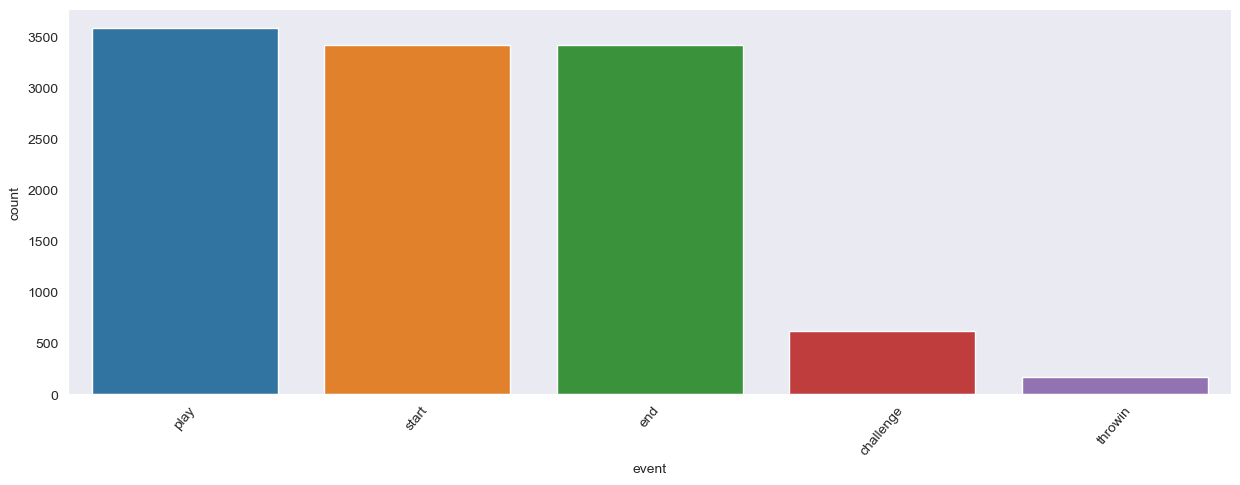

In [22]:
plt.figure(figsize=(15, 5))  
sns.countplot(data=df, x='event', order = df['event'].value_counts().index)
plt.xticks(rotation=50)
plt.show()

### Event_attributes

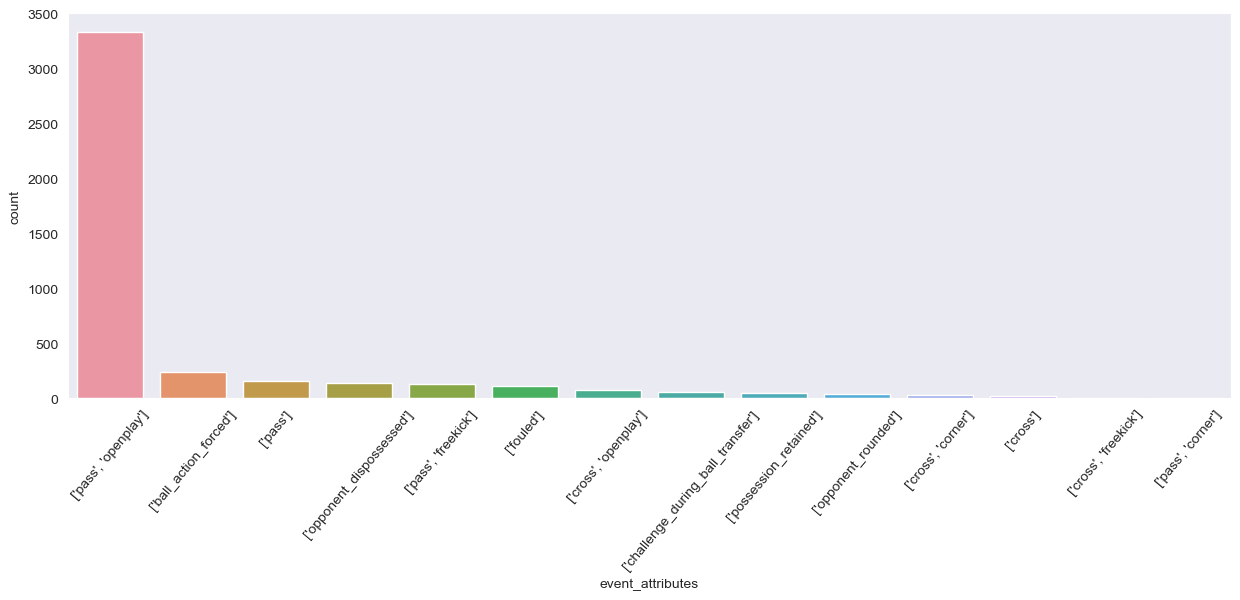

In [23]:
plt.figure(figsize=(15, 5))  
sns.countplot(data=df, x='event_attributes', order = df['event_attributes'].value_counts().index)
plt.xticks(rotation=50)
plt.show()

### Overview

In [24]:
new_df = df.copy()

In [25]:
new_df['time_in_min'] = (new_df['time']/60).astype(int)
new_df_gd = pd.get_dummies(new_df['event'], columns=['play', 'start', 'challenge', 'end'])
new_df_all = pd.concat([new_df, new_df_gd],  axis= 1) 

In [26]:
unique_game = df['unique_video_id'].value_counts().index.to_list()

Game summary
Game ID: 1606b0e6
Number of play: 753
Number of challenge: 116
Number of throwin: 34
Total events: 903


Number of interval: 673
Interval using 2 or more events: 230


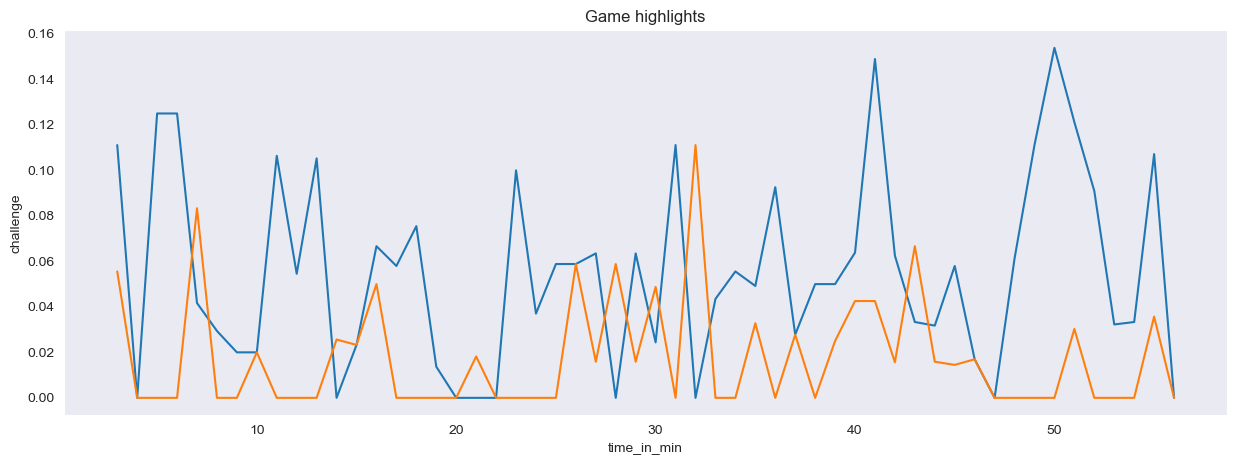

Game summary
Game ID: 35bd9041
Number of play: 645
Number of challenge: 105
Number of throwin: 20
Total events: 770


Number of interval: 619
Interval using 2 or more events: 151


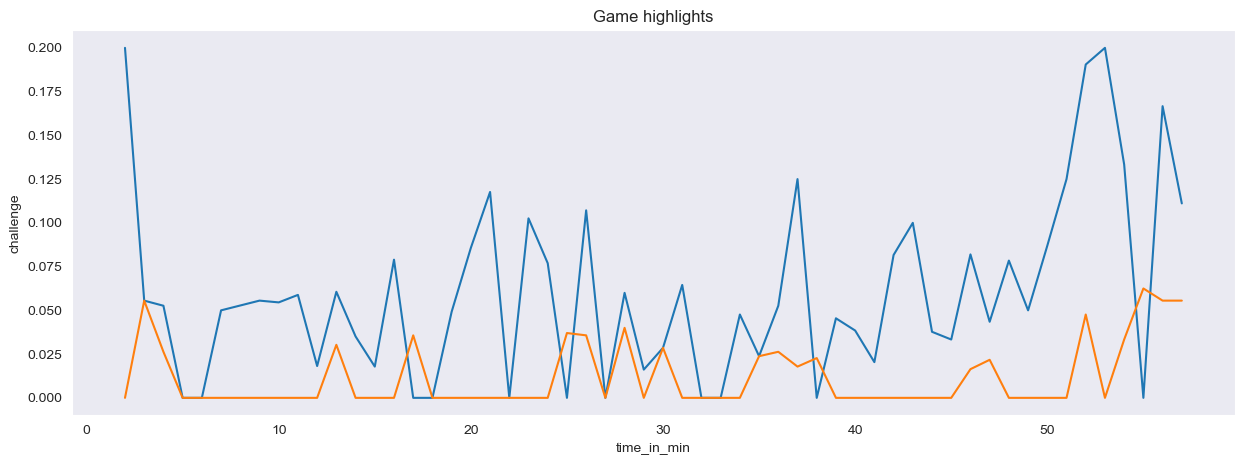

Game summary
Game ID: 3c993bd2
Number of play: 636
Number of challenge: 123
Number of throwin: 31
Total events: 790


Number of interval: 609
Interval using 2 or more events: 181


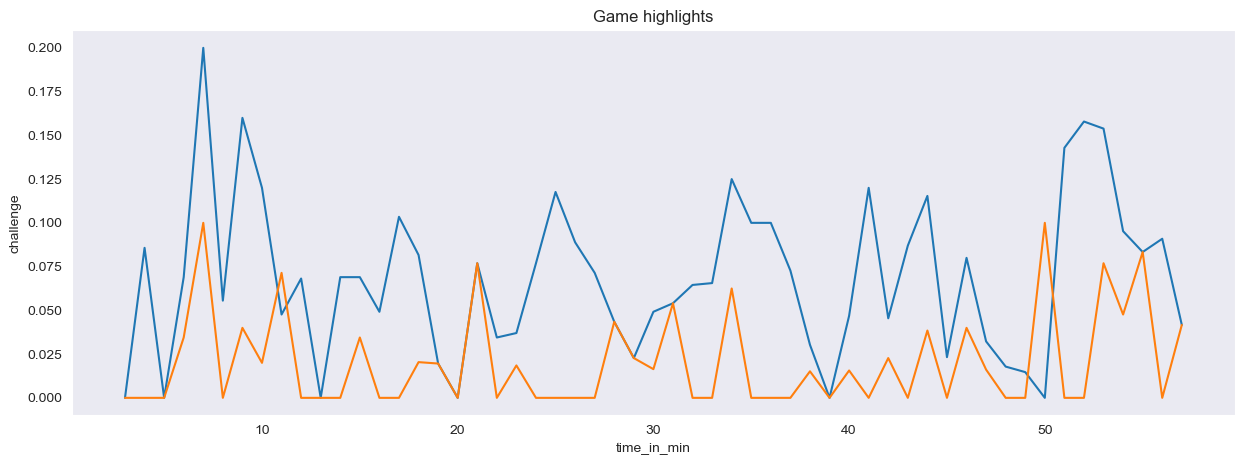

Game summary
Game ID: cfbe2e94
Number of play: 473
Number of challenge: 73
Number of throwin: 44
Total events: 590


Number of interval: 498
Interval using 2 or more events: 92


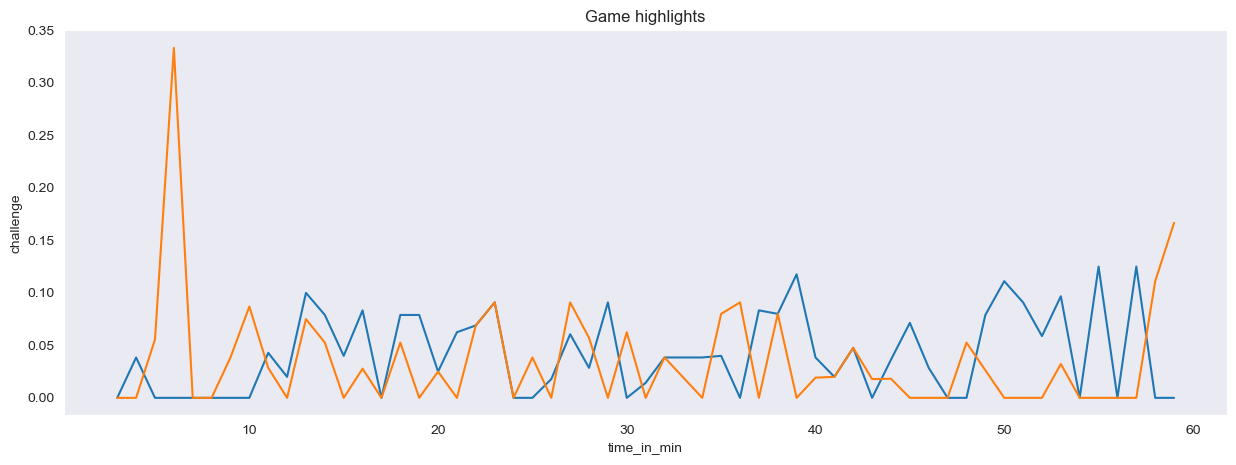

Game summary
Game ID: ecf251d4
Number of play: 324
Number of challenge: 46
Number of throwin: 16
Total events: 386


Number of interval: 297
Interval using 2 or more events: 89


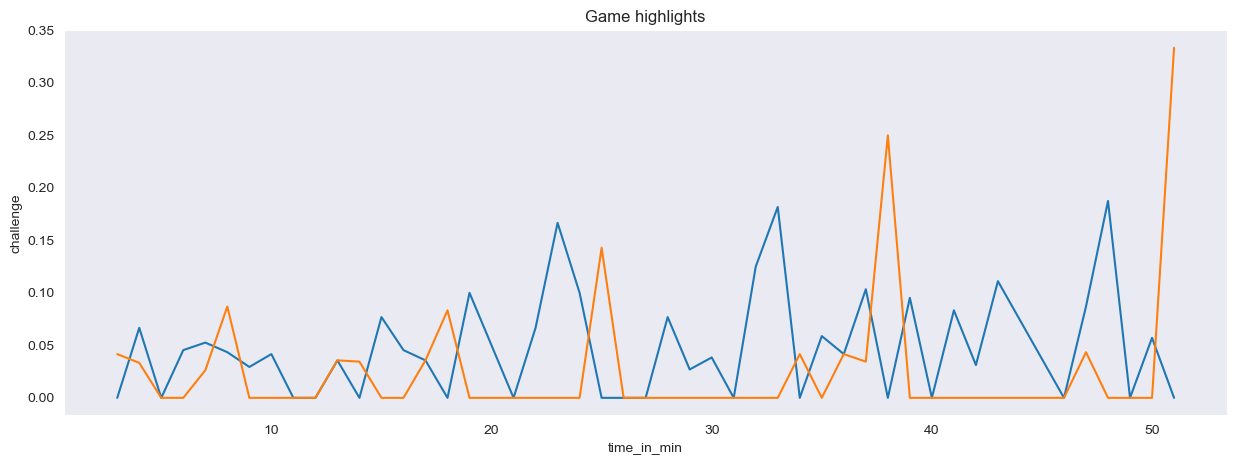

Game summary
Game ID: 407c5a9e
Number of play: 283
Number of challenge: 56
Number of throwin: 11
Total events: 350


Number of interval: 254
Interval using 2 or more events: 96


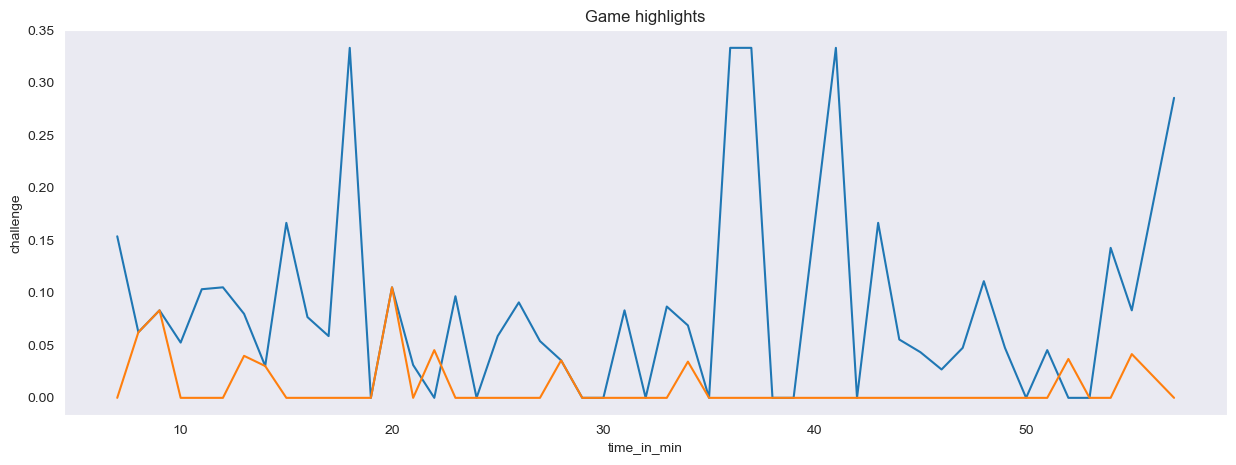

Game summary
Game ID: 4ffd5986
Number of play: 235
Number of challenge: 57
Number of throwin: 10
Total events: 302


Number of interval: 245
Interval using 2 or more events: 57


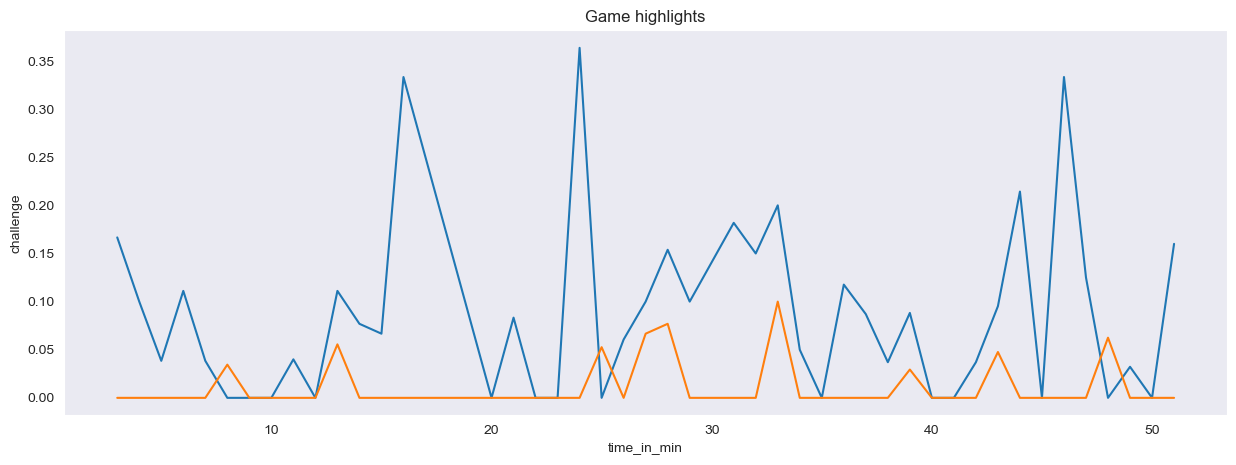

Game summary
Game ID: 9a97dae4
Number of play: 237
Number of challenge: 48
Number of throwin: 6
Total events: 291


Number of interval: 223
Interval using 2 or more events: 68


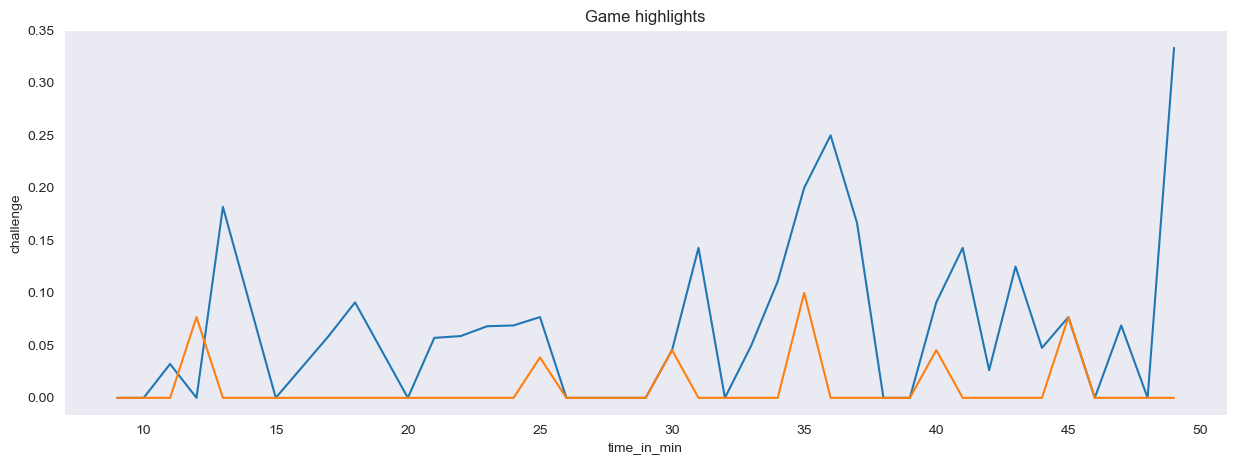

In [27]:
for game in unique_game:
    plt.figure(figsize=(15, 5)) 
    plt.title('Game highlights')
    test_time_serie = new_df_all[new_df_all['unique_video_id'] == game]
    sns.lineplot(x = "time_in_min", y = "challenge", data = test_time_serie, errorbar=None)
    sns.lineplot(x = "time_in_min", y = "throwin", data = test_time_serie, errorbar=None)
    #sns.lineplot(x = "time_in_min", y = "play", data = test_time_serie, errorbar=None)
    #plt.legend()
    
    play = test_time_serie['play'].value_counts()[1]
    challenge = test_time_serie['challenge'].value_counts()[1]
    throwin = test_time_serie['throwin'].value_counts()[1]
    total = play + challenge + throwin
    
    start = test_time_serie['start'].value_counts()[1]
    end = test_time_serie['end'].value_counts()[1]
    
    print("Game summary")
    print(f"Game ID: {game}")
    print(f"Number of play: {play}")
    print(f"Number of challenge: {challenge}")
    print(f"Number of throwin: {throwin}")
    print(f"Total events: {total}")
    print("\n")
    
    assert start == end
    print(f"Number of interval: {start}")
    print(f"Interval using 2 or more events: {total - start}")
    plt.show()

## Timing

#### Time Interval

In [28]:
df_with_dummies_gp

,time,challenge,end,play,start,throwin
event_index,,,,,,
1,201.393881,201.150,202.765822,NaN,200.265822,NaN
2,211.206074,210.870,212.624111,NaN,210.124111,NaN
3,219.143475,NaN,220.350213,NaN,217.850213,219.230
4,224.930567,NaN,226.430850,224.430,223.930850,NaN
5,229.933578,NaN,231.455367,229.390,228.955367,NaN
...,...,...,...,...,...,...
3414,3032.151216,NaN,3033.183323,3032.587,3030.683323,NaN
3415,3041.700016,NaN,3043.126523,3041.347,3040.626523,NaN
3416,3051.663976,NaN,3053.744023,3051.707,3049.497881,NaN


In [29]:
df_with_dummies_gp['time_interval'] = df_with_dummies_gp['end'] - df_with_dummies_gp['start']

In [30]:
time_interval_length = df_with_dummies_gp.time_interval

In [31]:
# challenge / throwin / play

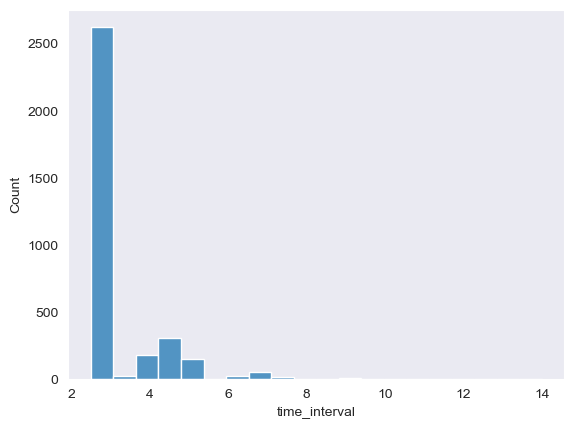

In [32]:
sns.histplot(time_interval_length, bins=20)
plt.show()

**Challenge**

Catch the moment when a challenge occurs in an interval

In [33]:
df_with_dummies_gp['challenge_to_start'] = df_with_dummies_gp.challenge - df_with_dummies_gp.start
df_with_dummies_gp['challenge_to_end'] = df_with_dummies_gp.end - df_with_dummies_gp.challenge

In [34]:
df_with_dummies_gp.sort_values(by='time_interval')

,time,challenge,end,play,start,throwin,time_interval,challenge_to_start,challenge_to_end
event_index,,,,,,,,,
3321,2046.759828,NaN,2048.016242,NaN,2045.516242,2046.747,2.500000,NaN,NaN
2,211.206074,210.87,212.624111,NaN,210.124111,NaN,2.500000,0.745889,1.754111
684,255.192343,254.71,256.683514,NaN,254.183514,NaN,2.500000,0.526486,1.973514
1314,361.535800,NaN,362.583701,361.940000,360.083701,NaN,2.500000,NaN,NaN
1,201.393881,201.15,202.765822,NaN,200.265822,NaN,2.500000,0.884178,1.615822
...,...,...,...,...,...,...,...,...,...
612,2919.282863,NaN,2924.775276,2919.150000,2914.454767,NaN,10.320509,NaN,NaN
2020,1691.861378,NaN,1697.308574,1691.790000,1686.771069,NaN,10.537505,NaN,NaN
818,1433.492587,NaN,1438.744324,1433.518000,1428.113784,NaN,10.630540,NaN,NaN


In [35]:
df_with_dummies_gp.describe().T

,count,mean,std,min,25%,50%,75%,max
time,3418.0,1793.936715,862.378595,176.153881,1053.184274,1777.195632,2534.572071,3573.947151
challenge,598.0,1879.165045,879.472418,178.830000,1128.667500,1923.375000,2604.427500,3468.260000
end,3418.0,1795.494906,862.346547,177.525822,1054.800270,1779.029948,2535.970481,3575.000727
play,2849.0,1773.991549,852.484001,175.910000,1043.310000,1757.750000,2508.517000,3562.660000
start,3418.0,1792.441793,862.394643,175.025822,1051.411681,1775.006050,2533.470481,3572.500727
throwin,172.0,1751.910674,903.589012,189.310000,953.120000,1728.608500,2431.307500,3574.340000
time_interval,3418.0,3.053114,1.164967,2.500000,2.500000,2.500000,2.500000,13.989647
challenge_to_start,598.0,1.531739,1.103986,0.348844,0.749406,1.167884,1.933260,8.377860
challenge_to_end,598.0,1.730759,0.991298,0.402352,1.106374,1.589278,1.999707,9.115187


In [36]:
pd.DataFrame(round(df_with_dummies_gp.describe().iloc[:,6],2), columns=['time_interval']).T.drop(['std','25%', '50%', '75%'], axis=1)

,count,mean,min,max
time_interval,3418.0,3.05,2.5,13.99


In [37]:
challenge_starts = round((df_with_dummies_gp.describe()['challenge_to_end']['mean'] + df_with_dummies_gp.describe()['challenge_to_start']['mean'])/2,2)

In [38]:
print(f'In average the challenge occurs {challenge_starts} after the interval started ')

In average the challenge occurs 1.63 after the interval started 


**convert time in minutes**

In [39]:
df['time_in_min'] = (df['time']/60).astype(int)

In [40]:
events = df.event.value_counts().index.to_list()

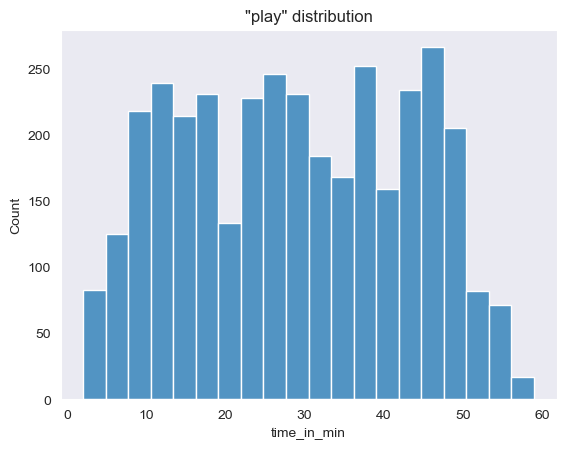

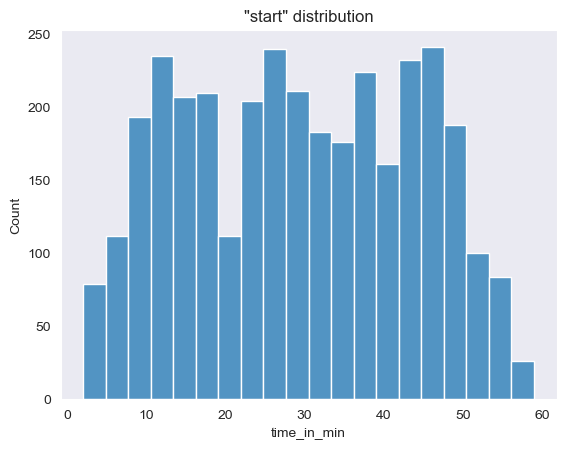

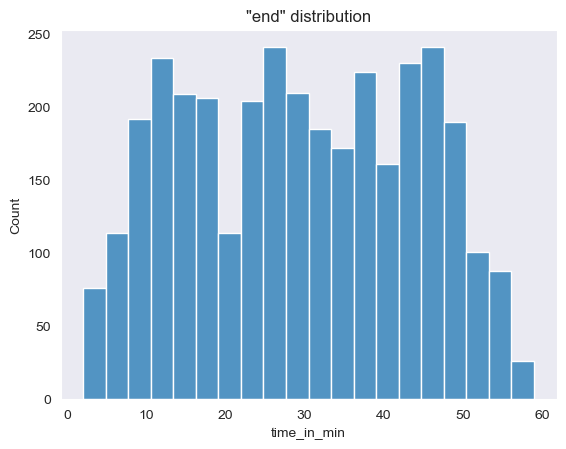

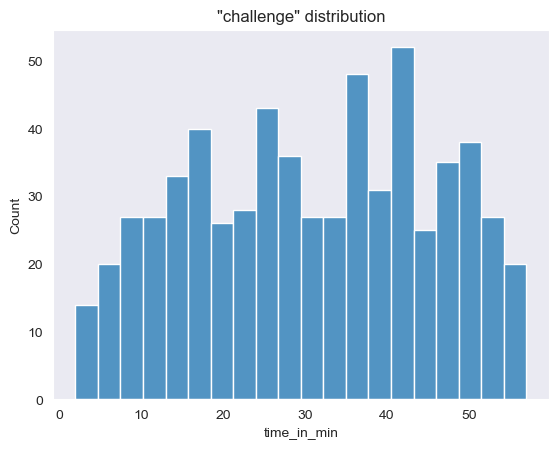

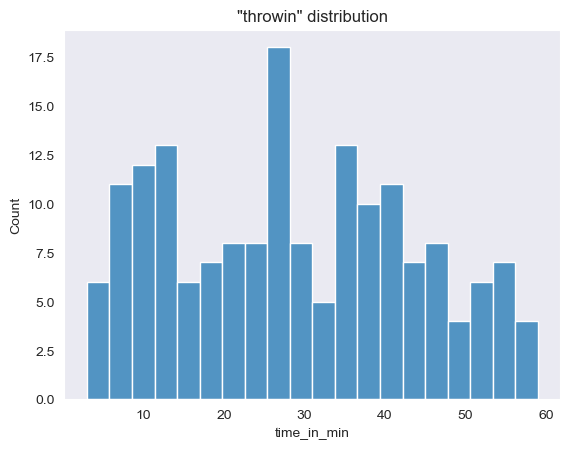

In [41]:
for event in events:
    plt.title(f'"{event}" distribution')
    event_ = df[df['event'] == event]
    sns.histplot(x=event_['time_in_min'], bins=20)
    plt.show()

## event_attributes

In [42]:
event_attributes = df.event_attributes.value_counts().index.to_list()

['pass', 'openplay']


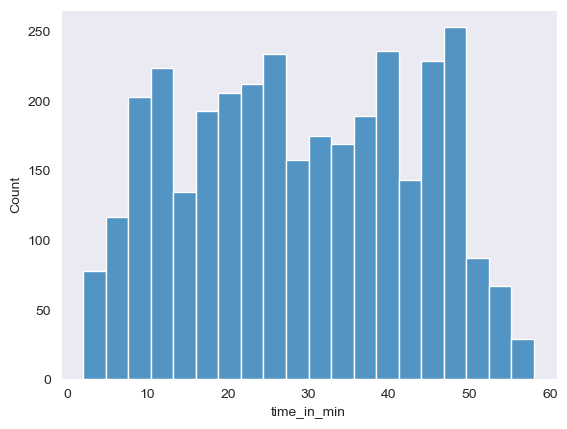

['ball_action_forced']


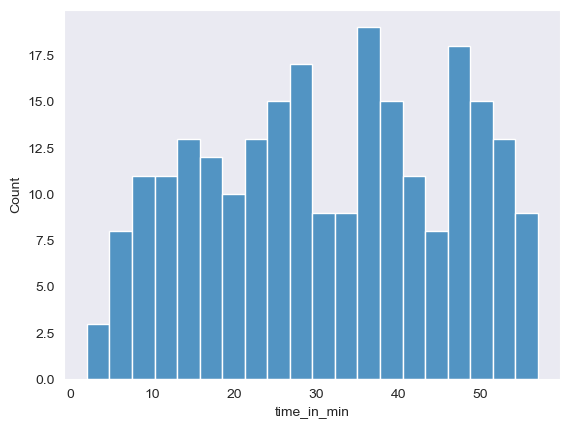

['pass']


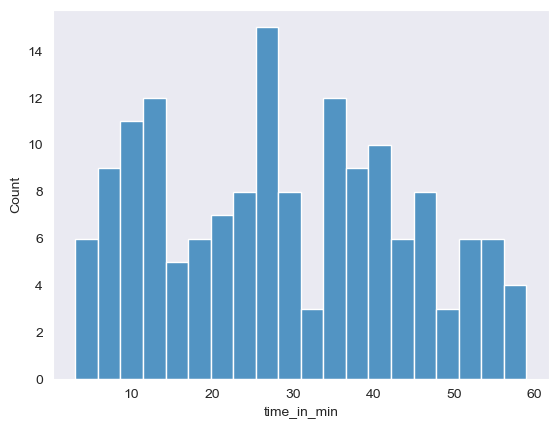

['opponent_dispossessed']


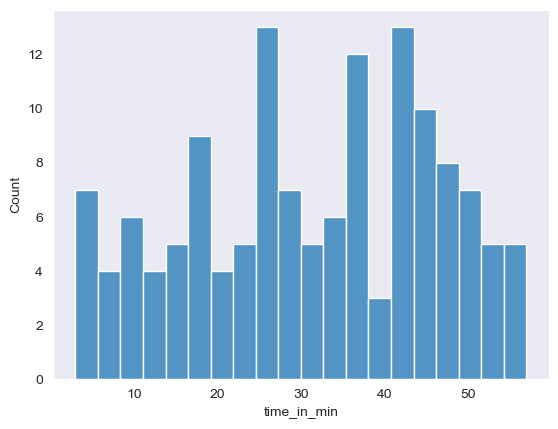

['pass', 'freekick']


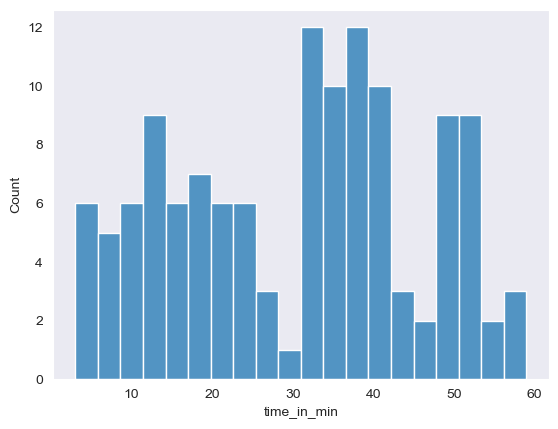

['fouled']


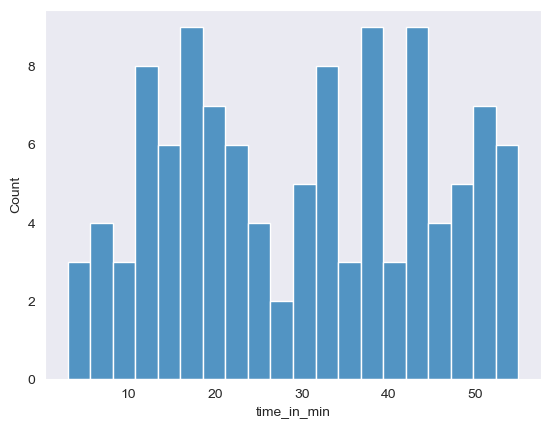

['cross', 'openplay']


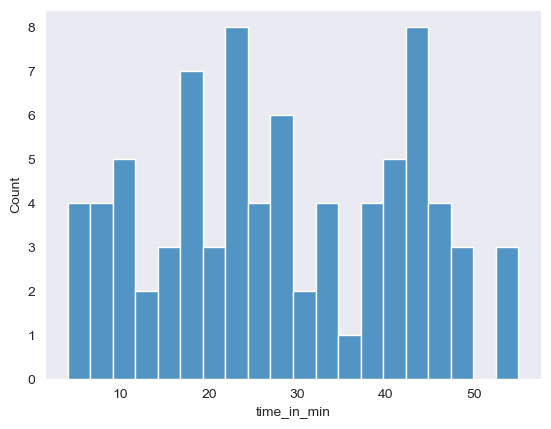

['challenge_during_ball_transfer']


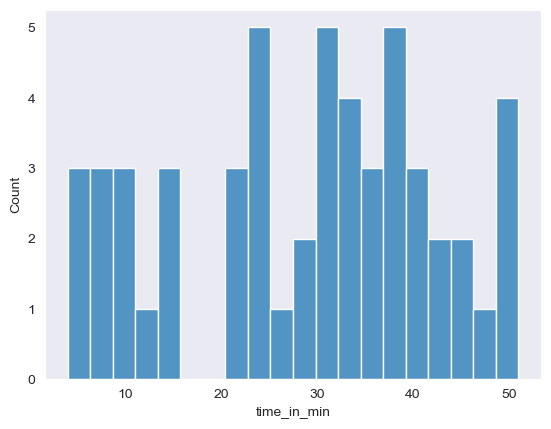

['possession_retained']


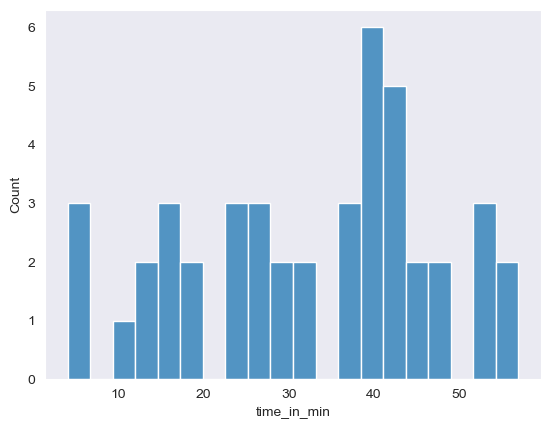

['opponent_rounded']


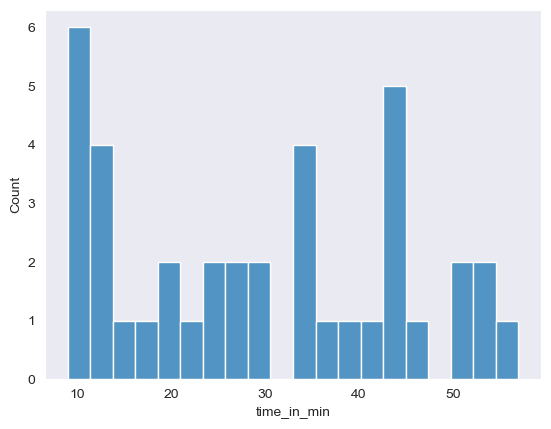

['cross', 'corner']


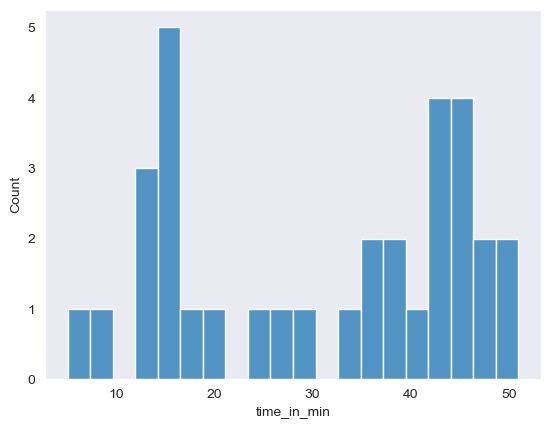

['cross']


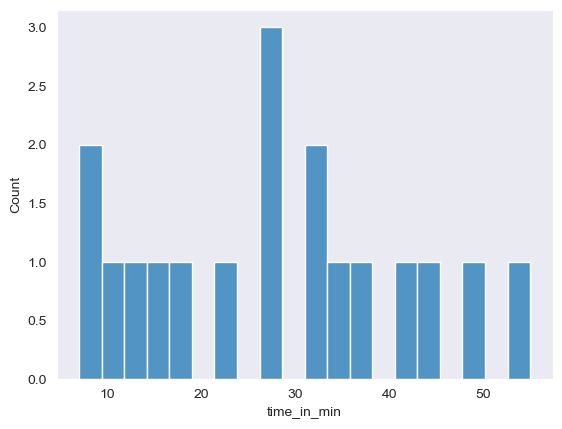

['cross', 'freekick']


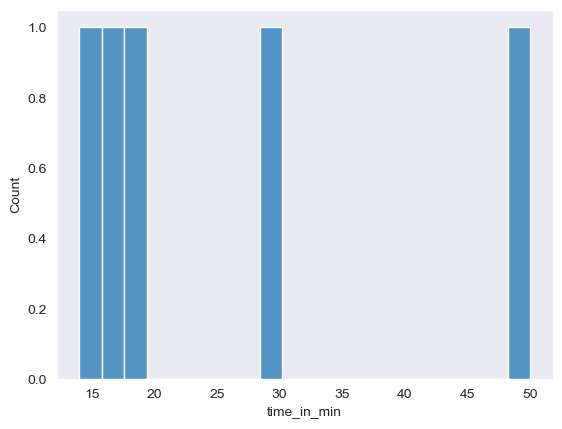

['pass', 'corner']


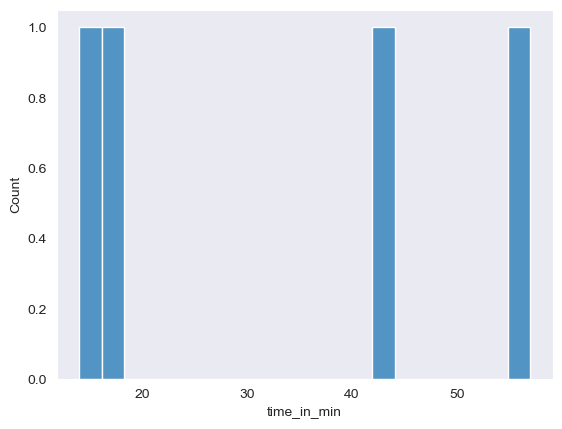

In [43]:
for event_attribute in event_attributes:
    print(event_attribute)
    event_ = df[df['event_attributes'] == event_attribute]
    sns.histplot(x=event_['time_in_min'], bins=20)
    plt.show()


In [44]:
play = df['event'].value_counts()['play']
start = df['event'].value_counts()['start']
challenge = df['event'].value_counts()['challenge']
throwin = df['event'].value_counts()['throwin']
total_event = play+challenge+throwin
total_event_interval = round(total_event/df['event'].value_counts()['start'],2)

In [45]:
print(f'We have {total_event} different events for {start} intervals, which means {total_event_interval} per interval')

We have 4382 different events for 3418 intervals, which means 1.28 per interval


In [46]:
df['event'].value_counts()

play         3586
start        3418
end          3418
challenge     624
throwin       172
Name: event, dtype: int64

### Event and Event_attributes

Text(0.5, 1.0, 'Distribution of Event by video_id')

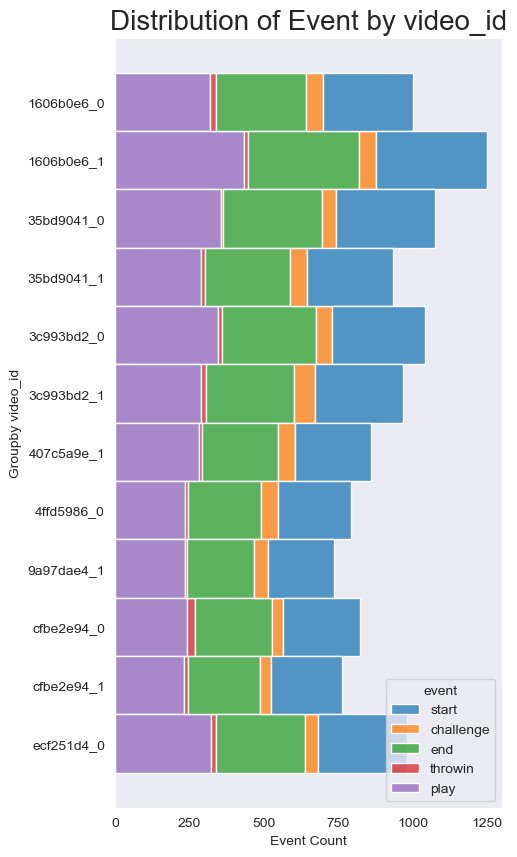

In [47]:
# Step 1.2 Train Data EDA => Event Numbers per video_id
sns.set_style(style="dark")
plt.figure(figsize=(5, 10))

graph = sns.histplot(data=df, y="video_id", hue='event', multiple='stack', discrete=True)
graph.set(xlim=(0,1300), xticks=np.arange(0,1300,250))
graph.set(xlabel="Event Count", ylabel="Groupby video_id")
graph.set_title('Distribution of Event by video_id', fontsize=20)

In [89]:
event_dist = df.copy()

In [90]:
event_dist = event_dist[(event_dist['event'] != 'start') | (event_dist['event'] != 'end')]

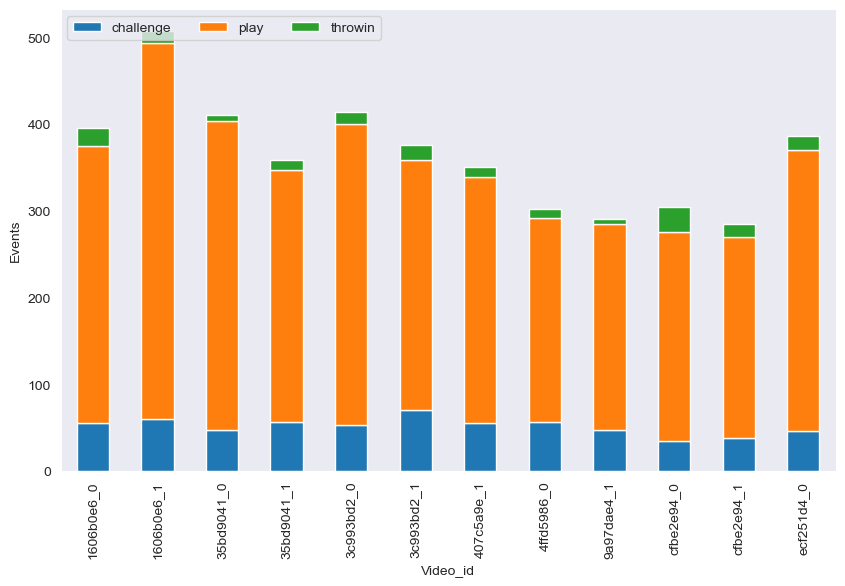

In [91]:

event_dist = event_dist.dropna(how='any')
#event_distribution = df.drop(['end'], axis=1)
event_dist =  pd.crosstab(event_dist['video_id'], event_dist['event'])
event_dist.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))
plt.legend(loc="upper left", ncol=5)
plt.xlabel("Video_id")
plt.ylabel("Events")
plt.show()

In [97]:
event_dist

event,challenge,play,throwin
video_id,,,
1606b0e6_0,56,319,21
1606b0e6_1,60,434,13
35bd9041_0,48,355,8
35bd9041_1,57,290,12
3c993bd2_0,53,347,14
3c993bd2_1,70,289,17
407c5a9e_1,56,283,11
4ffd5986_0,57,235,10
9a97dae4_1,48,237,6


In [98]:
event_dist['total'] = event_dist['challenge'] + event_dist['play'] + event_dist['throwin']

In [103]:
event_dist['% challenge'] = round(event_dist['challenge']/event_dist['total'],2)
event_dist['% play'] = round(event_dist['play']/event_dist['total'],2)
event_dist['% throwin'] = round(event_dist['throwin']/event_dist['total'],2)

In [104]:
event_dist

event,challenge,play,throwin,total,% challenge,% play,% throwin
video_id,,,,,,,
1606b0e6_0,56,319,21,396,0.14,0.81,0.05
1606b0e6_1,60,434,13,507,0.12,0.86,0.03
35bd9041_0,48,355,8,411,0.12,0.86,0.02
35bd9041_1,57,290,12,359,0.16,0.81,0.03
3c993bd2_0,53,347,14,414,0.13,0.84,0.03
3c993bd2_1,70,289,17,376,0.19,0.77,0.05
407c5a9e_1,56,283,11,350,0.16,0.81,0.03
4ffd5986_0,57,235,10,302,0.19,0.78,0.03
9a97dae4_1,48,237,6,291,0.16,0.81,0.02


In [48]:
df.groupby('video_id').event.value_counts(), len(df.groupby('video_id'))

(video_id    event    
 1606b0e6_0  play         319
             end          302
             start        302
             challenge     56
             throwin       21
 1606b0e6_1  play         434
             end          371
             start        371
             challenge     60
             throwin       13
 35bd9041_0  play         355
             end          332
             start        332
             challenge     48
             throwin        8
 35bd9041_1  play         290
             end          287
             start        287
             challenge     57
             throwin       12
 3c993bd2_0  play         347
             end          314
             start        314
             challenge     53
             throwin       14
 3c993bd2_1  end          295
             start        295
             play         289
             challenge     70
             throwin       17
 407c5a9e_1  play         283
             end          254
             star

<AxesSubplot:xlabel='count', ylabel='video_id'>

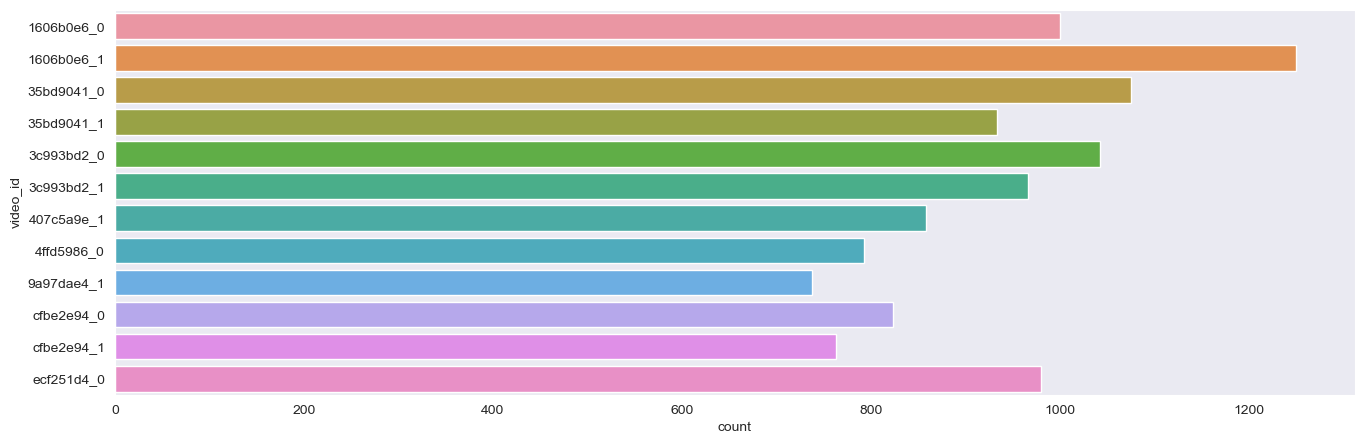

In [49]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df, y="video_id")

<AxesSubplot:xlabel='count', ylabel='video_id'>

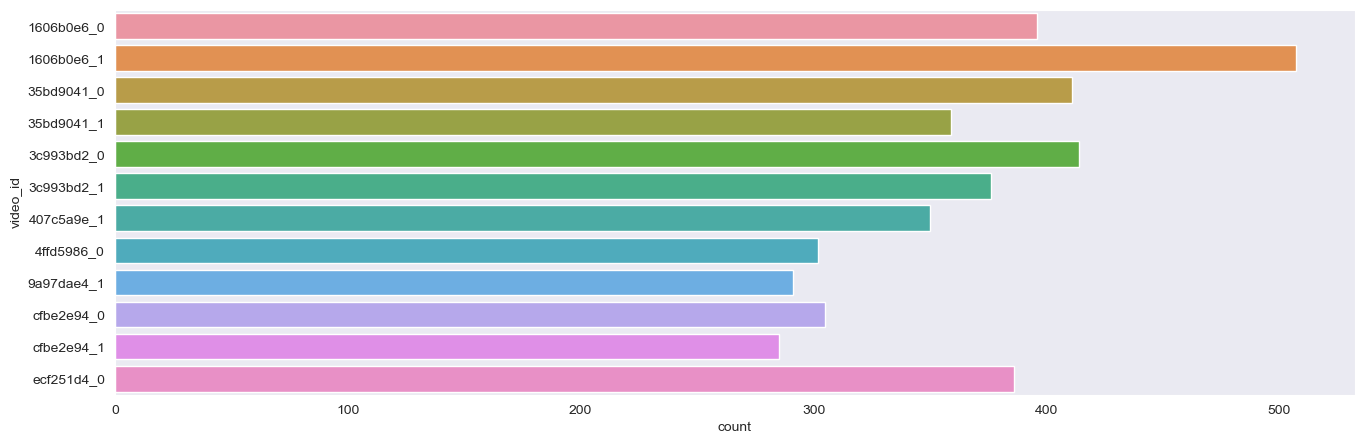

In [50]:

plt.figure(figsize=(16, 5))
sns.countplot(data=df[(df["event"] != "start") & (df["event"] != "end")], y="video_id")

### EVENT: challenge

In [51]:
df_challenge = df[df["event"] == "challenge"].reset_index()

[]

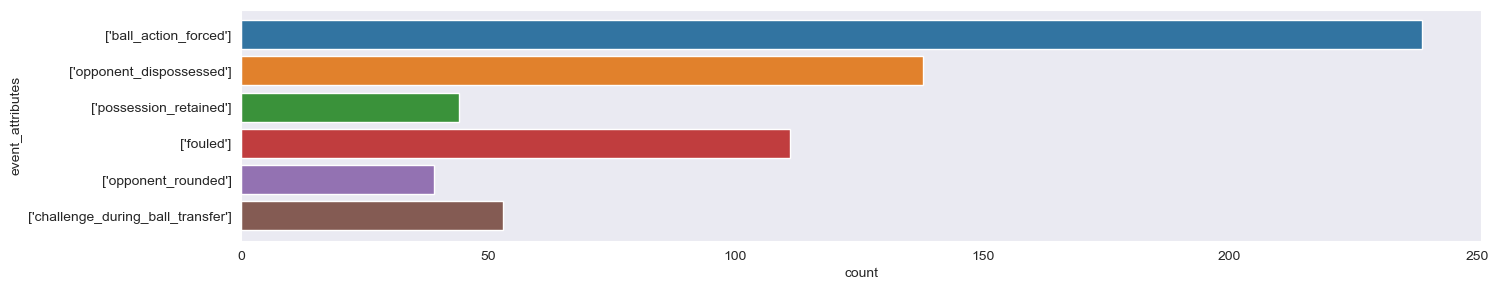

In [52]:
plt.figure(figsize=(16, 3))
sns.countplot(data=df_challenge, y="event_attributes")
plt.plot()

[]

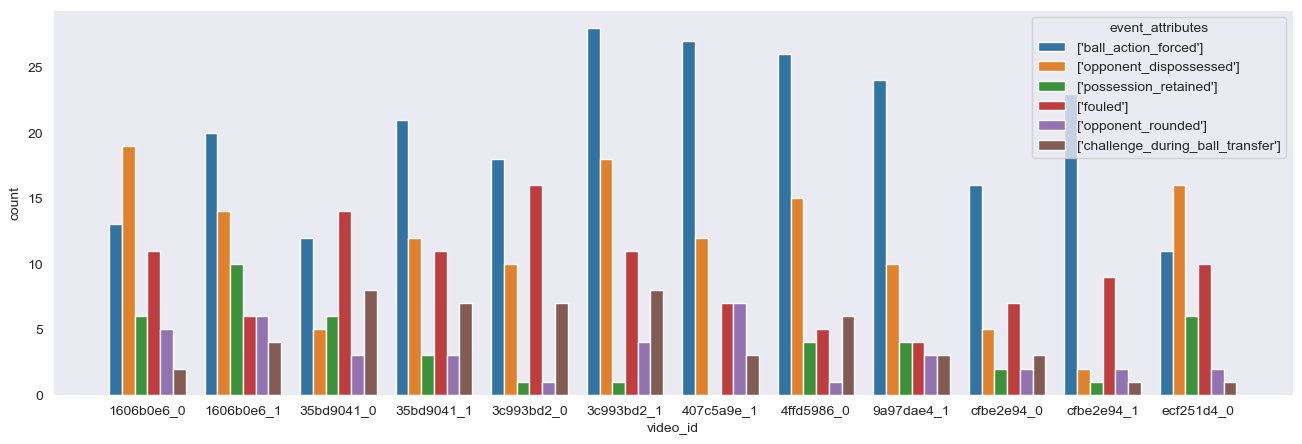

In [53]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df_challenge, x="video_id", hue="event_attributes")
plt.plot()

In [54]:
df_challenge["event_attributes"].value_counts()

['ball_action_forced']                239
['opponent_dispossessed']             138
['fouled']                            111
['challenge_during_ball_transfer']     53
['possession_retained']                44
['opponent_rounded']                   39
Name: event_attributes, dtype: int64

### EVENT: play

In [55]:
df_play = df[df["event"] == "play"].reset_index()

[]

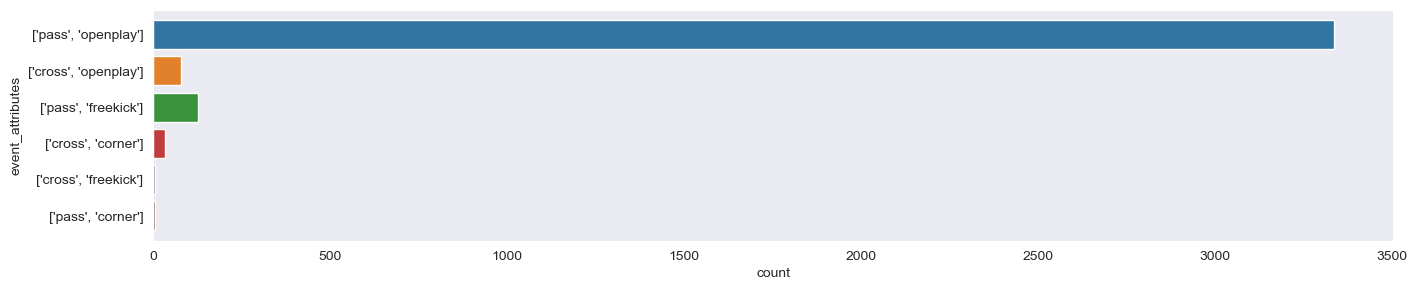

In [56]:
plt.figure(figsize=(16, 3))
sns.countplot(data=df_play, y="event_attributes")
plt.plot()

[]

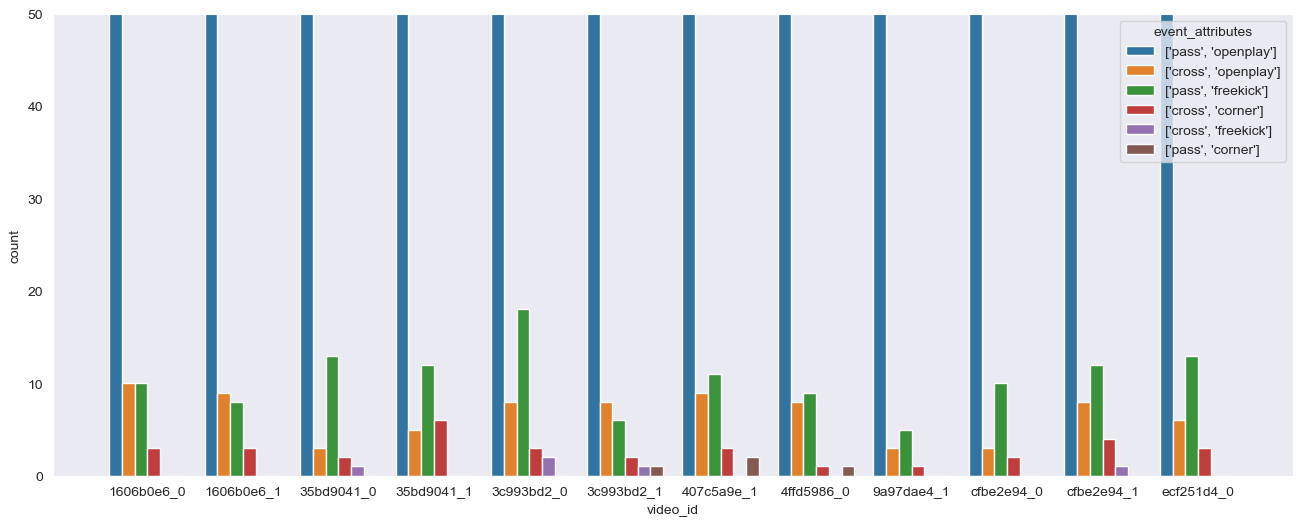

In [57]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_play, x="video_id", hue="event_attributes")
plt.ylim(0, 50)
plt.plot()

### EVENT: throwin

In [58]:
df_throwin = df[df["event"] == "throwin"].reset_index()

[]

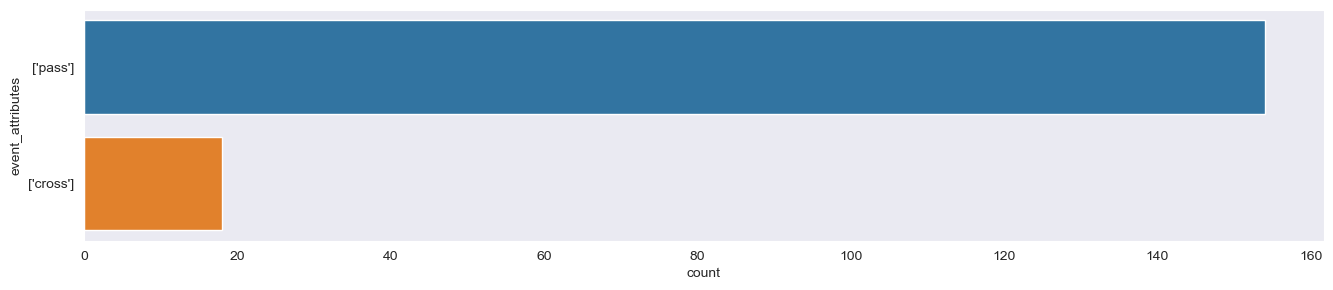

In [59]:
plt.figure(figsize=(16, 3))
sns.countplot(data=df_throwin, y="event_attributes")
plt.plot()

[]

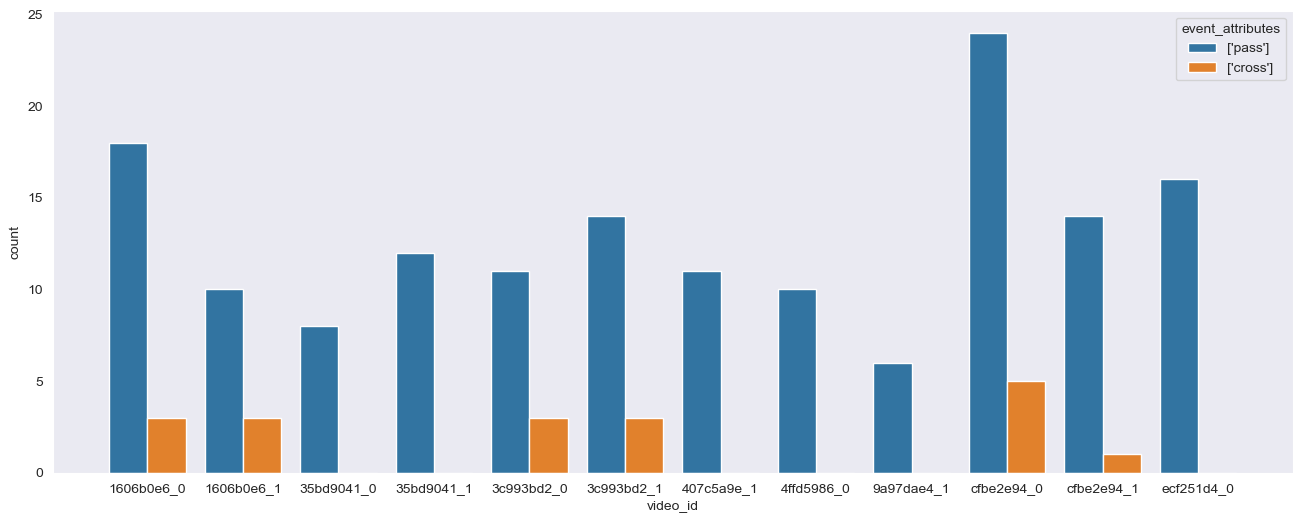

In [60]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_throwin, x="video_id", hue="event_attributes")
plt.plot()